In [1]:
import pandas as pd 
from pathlib import Path


import sys
sys.path.append('..')
data_dir = Path("../")

# returns = pd.read_csv("data/processed/dataset_returns.csv", index_col=0)
log_returns = pd.read_csv(data_dir / "data/processed/dataset_log_returns.csv", index_col=0)


# Remove the first line with NaN
# returns = returns.dropna(how='all')
log_returns = log_returns.dropna(how='all')
log_returns

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WSM,WST,WTW,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.010922,0.001728,-0.008112,-0.003341,0.006161,0.016313,-0.001580,0.005387,-0.005385,-0.015309,...,0.027464,-0.012749,-0.002244,0.021006,0.059042,-0.011931,0.003897,-0.003426,0.031165,-0.001745
2010-01-06,-0.003560,-0.016034,0.005538,-0.004332,0.010574,-0.002124,-0.001899,-0.002532,-0.002350,0.002371,...,0.034882,-0.009799,0.015971,-0.011119,-0.013204,0.001919,0.008606,-0.007174,-0.000323,-0.007717
2010-01-07,-0.001297,-0.001850,0.008251,-0.005900,-0.000936,-0.019595,-0.007953,-0.010511,-0.000471,0.005510,...,0.046704,0.003105,-0.002952,-0.004482,0.021131,-0.004322,-0.003147,-0.000288,0.022681,-0.025318
2010-01-08,-0.000325,0.006626,0.005099,-0.001974,-0.003985,-0.005436,0.005733,-0.012567,-0.001413,0.030153,...,-0.015618,-0.000259,-0.001109,-0.009252,-0.007191,0.000481,-0.004019,0.000288,-0.021228,-0.003256
2010-01-11,0.000649,-0.008861,0.005073,-0.003110,-0.000940,-0.013169,-0.005733,0.000648,0.004468,-0.000381,...,-0.008784,-0.004402,0.009939,0.006553,-0.003245,0.009574,0.011157,0.017133,0.021860,0.003256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011083,0.011413,0.003929,0.006278,0.007940,0.002683,0.014781,0.004355,0.007822,0.012494,...,0.006466,0.009663,0.005235,0.006390,0.007575,0.007210,0.000940,0.008480,0.004483,0.012187
2024-12-26,-0.001986,0.003171,0.004434,0.002802,-0.003324,0.004944,-0.000138,-0.000395,0.002594,-0.003159,...,-0.000533,0.001981,0.005805,-0.003190,0.005952,-0.000440,0.000845,0.007380,-0.000466,0.003559
2024-12-27,-0.002137,-0.013331,-0.002432,-0.006369,-0.011862,-0.008208,-0.004919,-0.000593,-0.003539,-0.008999,...,-0.008456,-0.000630,-0.004920,-0.006410,-0.007079,-0.000587,-0.000094,-0.005678,-0.003549,-0.019799


After checking, it’s not a stock split — it’s just a macroeconomic event. I was afraid beacause I scrapped the data from Yahoo Finance but with the new version, there is no more the "Ajd Close" column.

# PCA Analysis

In [3]:
from src.utils.data_explo_func import import_sector_data, make_pca_analysis, perform_pca, analyze_pca_results

sectors = pd.read_csv(data_dir / "data/raw/tickers_sectors.csv", index_col=0)
sector_list = sectors.Sector.unique().tolist()
print(sector_list)

sector_returns, sector_log_returns = import_sector_data("Information Technology", data_dir)
sector_log_returns

['Health Care', 'Information Technology', 'Financials', 'Consumer Staples', 'Industrials', 'Utilities', 'Materials', 'Real Estate', 'Consumer Discretionary', 'Energy', 'Communication Services']


,AAPL,ACN,ADBE,ADI,ADSK,AKAM,AMAT,AMD,APH,AVGO,...,SWKS,TDY,TEL,TER,TRMB,TXN,TYL,VRSN,WDC,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.001728,0.006161,0.016313,-0.001580,-0.015309,0.029274,-0.007722,0.001030,-0.021118,0.007396,...,0.015400,-0.005076,-0.014892,0.003644,-0.005081,-0.005784,0.023370,0.010454,0.026168,-0.001745
2010-01-06,-0.016034,0.010574,-0.002124,-0.001899,0.002371,-0.008277,-0.002116,-0.014523,0.003772,0.007864,...,-0.009346,0.001780,0.020073,-0.009133,-0.002747,-0.007374,-0.000481,-0.010859,0.000861,-0.007717
2010-01-07,-0.001850,-0.000936,-0.019595,-0.007953,0.005510,0.000378,-0.010650,-0.010504,-0.006666,-0.006286,...,-0.011468,0.012871,-0.018857,0.005489,0.001570,0.003112,-0.013085,-0.013844,-0.019764,-0.025318
2010-01-08,0.006626,-0.003985,-0.005436,0.005733,0.030153,0.000000,0.037820,-0.004233,0.007331,0.007330,...,0.017486,0.010476,0.012477,0.010890,0.007816,0.022654,0.011639,0.007760,0.005032,-0.003256
2010-01-11,-0.008861,-0.000940,-0.013169,-0.005733,-0.000381,-0.003405,0.021755,-0.031236,0.002432,0.006240,...,0.000666,0.016245,-0.008838,0.038943,-0.008208,-0.012992,-0.011152,-0.002852,0.001091,0.003256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011413,0.007940,0.002683,0.014781,0.012494,0.003204,0.005419,0.013472,0.009394,0.031060,...,0.001772,0.010390,0.009599,0.011531,0.009788,0.012024,0.008143,0.007573,0.002272,0.012187
2024-12-26,0.003171,-0.003324,0.004944,-0.000138,-0.003159,0.010776,-0.004882,-0.009787,-0.001396,0.023422,...,0.000775,0.003279,0.005483,0.006749,0.005965,-0.003696,-0.010771,0.006185,0.000162,0.003559
2024-12-27,-0.013331,-0.011862,-0.008208,-0.004919,-0.008999,-0.010158,-0.004306,0.001039,-0.011525,-0.014822,...,-0.002990,-0.010823,-0.009064,-0.017735,-0.015331,-0.002873,-0.009729,0.006000,-0.016502,-0.019799


In [5]:
for sector in sector_list:
    sector_returns, sector_log_returns = import_sector_data(sector, data_dir)
    print(sector, sector_returns.shape[1])

Health Care 53
Information Technology 53
Financials 64
Consumer Staples 33
Industrials 64
Utilities 29
Materials 22
Real Estate 29
Consumer Discretionary 43
Energy 16
Communication Services 17


In [6]:
# Perform a PCA on the entire dataset

pca, transformed_data, explained_variance_ratio = perform_pca(log_returns, n_components=3)

pc_df = analyze_pca_results(pca, transformed_data, explained_variance_ratio, log_returns)
display(pc_df)

Shape of transformed data: (3773, 3)

Explained variance ratio:
PC1: 0.3826 (38.26%)
PC2: 0.0467 (4.67%)
PC3: 0.0309 (3.09%)

Cumulative variance explained: 46.03%


,PC1,PC2,PC3
Date,,,
2010-01-05,2.046569,-5.255052,-3.704053
2010-01-06,1.307090,-0.719836,-1.826525
2010-01-07,5.455600,-3.167296,-3.913841
2010-01-08,2.353545,-3.243720,1.650741
2010-01-11,2.996684,3.100927,-1.570020
...,...,...,...
2024-12-24,8.191767,-0.089549,0.323863
2024-12-26,0.850147,-0.389316,-0.376898
2024-12-27,-8.308064,0.885094,-1.070120


C:\Users\xtrem\AppData\Local\Temp\ipykernel_58500\4049549228.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(n_components_range, explained_variances, 'bo-', color='red', linewidth=2, markersize=8)


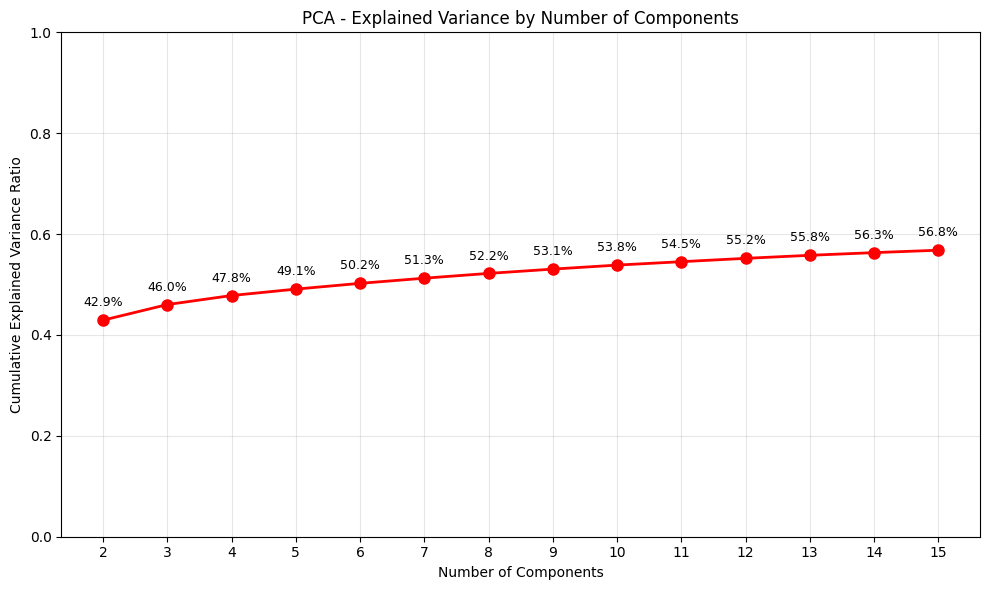

Explained variance by number of components:
2 components: 0.429 (42.9%)
3 components: 0.460 (46.0%)
4 components: 0.478 (47.8%)
5 components: 0.491 (49.1%)
6 components: 0.502 (50.2%)
7 components: 0.513 (51.3%)
8 components: 0.522 (52.2%)
9 components: 0.531 (53.1%)
10 components: 0.538 (53.8%)
11 components: 0.545 (54.5%)
12 components: 0.552 (55.2%)
13 components: 0.558 (55.8%)
14 components: 0.563 (56.3%)
15 components: 0.568 (56.8%)


In [10]:
import matplotlib.pyplot as plt

# Plot explained variance for different numbers of components
n_components_range = range(2, 16)
explained_variances = []

for n in n_components_range:
    pca_temp, _, explained_var_ratio = perform_pca(log_returns, n_components=n)
    total_explained = sum(explained_var_ratio)
    explained_variances.append(total_explained)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variances, 'bo-', color='red', linewidth=2, markersize=8)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Explained Variance by Number of Components')
plt.grid(True, alpha=0.3)
plt.xticks(n_components_range)
plt.ylim(0, 1)

# Add percentage labels on points
for i, (n, var) in enumerate(zip(n_components_range, explained_variances)):
    plt.annotate(f'{var:.1%}', (n, var), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("Explained variance by number of components:")
for n, var in zip(n_components_range, explained_variances):
    print(f"{n} components: {var:.3f} ({var*100:.1f}%)")


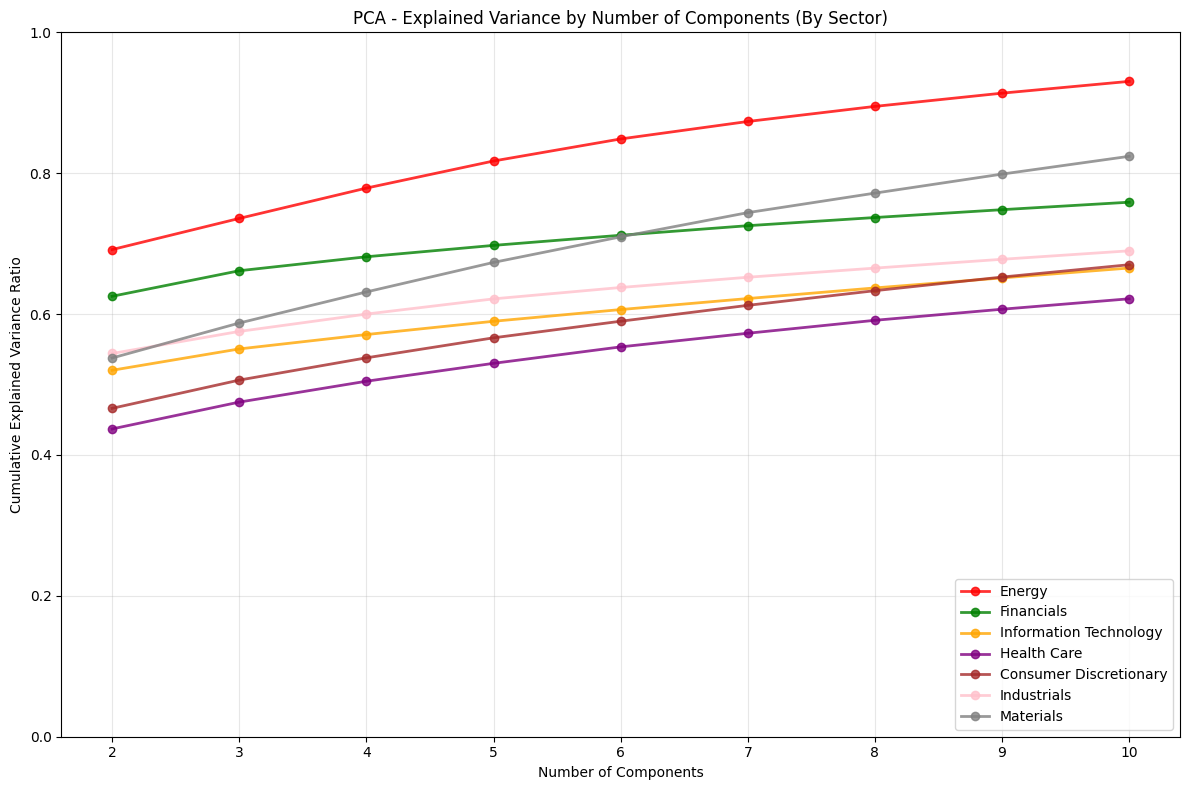


Detailed results by sector:

Energy:
  2 components: 0.692 (69.2%)
  3 components: 0.736 (73.6%)
  4 components: 0.779 (77.9%)
  5 components: 0.817 (81.7%)
  6 components: 0.849 (84.9%)
  7 components: 0.873 (87.3%)
  8 components: 0.895 (89.5%)
  9 components: 0.914 (91.4%)
  10 components: 0.930 (93.0%)

Financials:
  2 components: 0.625 (62.5%)
  3 components: 0.662 (66.2%)
  4 components: 0.681 (68.1%)
  5 components: 0.698 (69.8%)
  6 components: 0.712 (71.2%)
  7 components: 0.725 (72.5%)
  8 components: 0.737 (73.7%)
  9 components: 0.748 (74.8%)
  10 components: 0.759 (75.9%)

Communications Services:
  Error analyzing Communications Services: [Errno 2] No such file or directory: '../data/processed/sectors/communications_services/returns.csv'

Information Technology:
  2 components: 0.520 (52.0%)
  3 components: 0.551 (55.1%)
  4 components: 0.571 (57.1%)
  5 components: 0.590 (59.0%)
  6 components: 0.606 (60.6%)
  7 components: 0.622 (62.2%)
  8 components: 0.637 (63.7%)
  

In [17]:
# Plot explained variance for each sector
n_components_range = range(2, 11)  # Reduced range since sectors have fewer stocks

plt.figure(figsize=(12, 8))

# Define colors for better visibility
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']
sectors = ["Energy", "Financials", "Communications Services", "Information Technology", "Health Care", "Consumer Discretionary", "Industrials", "Materials"]

for i, sector in enumerate(sectors):
    explained_variances = []
    
    for n in n_components_range:
        try:
            _, sector_log_returns = import_sector_data(sector, data_dir)
            pca_temp, _, explained_var_ratio = perform_pca(sector_log_returns, n_components=n)
            total_explained = sum(explained_var_ratio)
            explained_variances.append(total_explained)
        except:
            # If PCA fails for this number of components, break
            break
    
    if explained_variances:
        color = colors[i % len(colors)]
        plt.plot(n_components_range[:len(explained_variances)], explained_variances, 
                'o-', color=color, linewidth=2, markersize=6, label=sector, alpha=0.8)

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Explained Variance by Number of Components (By Sector)')
plt.grid(True, alpha=0.3)
plt.xticks(n_components_range)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Print detailed results for each sector
print("\nDetailed results by sector:")
for sector in sectors:
    print(f"\n{sector}:")
    try:
        _, sector_log_returns = import_sector_data(sector, data_dir)
        max_components = min(10, sector_log_returns.shape[1])
        
        for n in range(2, max_components + 1):
            pca_temp, _, explained_var_ratio = perform_pca(sector_log_returns, n_components=n)
            total_explained = sum(explained_var_ratio)
            print(f"  {n} components: {total_explained:.3f} ({total_explained*100:.1f}%)")
    except Exception as e:
        print(f"  Error analyzing {sector}: {e}")


# MLP AE 

In [24]:
# Convert log_returns to tensor and move to device
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


log_returns_tensor = torch.tensor(log_returns.values, dtype=torch.float32).to(device)
print(f"Log returns tensor shape: {log_returns_tensor.shape}")
print(f"Device: {log_returns_tensor.device}")


Log returns tensor shape: torch.Size([3773, 423])
Device: cuda:0


In [40]:
# Z-score normalization and clipping
from scipy import stats
import numpy as np

# Calculate z-scores
log_returns_zscore = stats.zscore(log_returns, axis=0, nan_policy='omit')

# Clip values between -3.5 and 3.5
log_returns_zscore = np.clip(log_returns_zscore, -3.5, 3.5)

# Convert to DataFrame to maintain structure
import pandas as pd
log_returns_zscore = pd.DataFrame(log_returns_zscore, 
                                 index=log_returns.index, 
                                 columns=log_returns.columns)

print(f"Original log_returns stats:")
print(f"  Mean: {log_returns.mean().mean():.6f}")
print(f"  Std: {log_returns.std().mean():.6f}")
print(f"  Min: {log_returns.min().min():.6f}")
print(f"  Max: {log_returns.max().max():.6f}")

print(f"\nZ-scored and clipped log_returns stats:")
print(f"  Mean: {log_returns_zscore.mean().mean():.6f}")
print(f"  Std: {log_returns_zscore.std().mean():.6f}")
print(f"  Min: {log_returns_zscore.min().min():.6f}")
print(f"  Max: {log_returns_zscore.max().max():.6f}")

# Update the tensor with z-scored data
log_returns_tensor = torch.tensor(log_returns_zscore.values, dtype=torch.float32).to(device)
print(f"\nUpdated tensor shape: {log_returns_tensor.shape}")
print(f"Device: {log_returns_tensor.device}")


Original log_returns stats:
  Mean: 0.000509
  Std: 0.018603
  Min: -0.773593
  Max: 0.557289

Z-scored and clipped log_returns stats:
  Mean: 0.002300
  Std: 0.918173
  Min: -3.500000
  Max: 3.500000

Updated tensor shape: torch.Size([3773, 423])
Device: cuda:0


In [59]:
def calc_var(mlp_ae, history):

    mlp_ae.eval()
    with torch.no_grad():
        reconstructed = mlp_ae.reconstruct(log_returns_tensor)
        
        # Calculate reconstruction error (MSE)
        mse = torch.mean((log_returns_tensor - reconstructed) ** 2).item()
        
        # Calculate explained variance
        # Explained variance = 1 - (variance of residuals / variance of original data)
        total_variance = torch.var(log_returns_tensor).item()
        residual_variance = torch.var(log_returns_tensor - reconstructed).item()
        explained_variance = 1 - (residual_variance / total_variance)
        
        print(f"\nAutoencoder with k={k}:")
        print(f"  Reconstruction MSE: {mse:.6f}")
        print(f"  Explained Variance: {explained_variance:.4f} ({explained_variance*100:.2f}%)")
        print(f"  Final Training Loss: {history['train_loss'][-1]:.6f}")
        print(f"  Training Time: {history.get('training_time', 'N/A'):.2f}s")
    return explained_variance

In [63]:
from src.models.ae_mlp import MLPAutoencoder

explained_variance_list = []
for k in range(2, 11):
    mlp_ae = MLPAutoencoder(input_dim=log_returns.shape[1], k=k, hidden=(128, 64), activation='relu', dropout_p=0.05, use_bn=False)

    history = mlp_ae.fit(
        X=log_returns_tensor,
        epochs= 200,
        batch_size=256, 
        learning_rate=0.001, 
        weight_decay=0.00001, 
        validation_split=0.2,
        device=device,
        amp=True,
        num_workers=4
    )

    
    explained_variance = calc_var(mlp_ae, history)
    explained_variance_list.append(explained_variance)
    
    


🚀 ENTRAÎNEMENT MLP AUTOENCODER
📊 Data: 3019 train | 754 val
🏗️  Arch: 423 -> 128 -> 64 -> 2 -> 64 -> 128 -> 423
⚙️  Params: epochs=200, bs=256, lr=0.001, loss=mse
🔧 Device: cuda | AMP: True
🔢 Paramètres: 125,737 total | 125,737 entraînables
----------------------------------------------------------------------------------------
📈 Époque   1/200 | Train: 0.828216 | Val: 0.713040 ⚠️ | LR: 1.00e-03 | ⏱️ 4.6s (ETA: 920.4s)
📈 Époque   2/200 | Train: 0.613705 | Val: 0.540675 ⚠️ | LR: 1.00e-03 | ⏱️ 4.7s (ETA: 466.8s)
📈 Époque   3/200 | Train: 0.533377 | Val: 0.526577 ⚠️ | LR: 1.00e-03 | ⏱️ 4.8s (ETA: 316.9s)
📈 Époque   4/200 | Train: 0.519235 | Val: 0.512511 ⚠️ | LR: 1.00e-03 | ⏱️ 4.9s (ETA: 241.3s)
📈 Époque   5/200 | Train: 0.502462 | Val: 0.492993 ⚠️ | LR: 1.00e-03 | ⏱️ 5.0s (ETA: 196.0s)
📈 Époque   6/200 | Train: 0.489093 | Val: 0.486812 ⚠️ | LR: 1.00e-03 | ⏱️ 5.1s (ETA: 165.5s)
📈 Époque   7/200 | Train: 0.484152 | Val: 0.484801 ⚠️ | LR: 1.00e-03 | ⏱️ 5.2s (ETA: 143.8s)
📈 Époque   8/200 | 

PCA Analysis for k=2 to 10:
PCA with k=2: Explained Variance = 0.4072 (40.72%)
PCA with k=3: Explained Variance = 0.4406 (44.06%)
PCA with k=4: Explained Variance = 0.4591 (45.91%)
PCA with k=5: Explained Variance = 0.4750 (47.50%)
PCA with k=6: Explained Variance = 0.4869 (48.69%)
PCA with k=7: Explained Variance = 0.4985 (49.85%)
PCA with k=8: Explained Variance = 0.5075 (50.75%)
PCA with k=9: Explained Variance = 0.5160 (51.60%)
PCA with k=10: Explained Variance = 0.5241 (52.41%)

Comparison - Autoencoder vs PCA:
k=2: AE=0.4441 (44.41%) | PCA=0.4072 (40.72%)
k=3: AE=0.4749 (47.49%) | PCA=0.4406 (44.06%)
k=4: AE=0.4922 (49.22%) | PCA=0.4591 (45.91%)
k=5: AE=0.5076 (50.76%) | PCA=0.4750 (47.50%)
k=6: AE=0.5189 (51.89%) | PCA=0.4869 (48.69%)
k=7: AE=0.5304 (53.04%) | PCA=0.4985 (49.85%)
k=8: AE=0.5381 (53.81%) | PCA=0.5075 (50.75%)
k=9: AE=0.5476 (54.76%) | PCA=0.5160 (51.60%)
k=10: AE=0.5581 (55.81%) | PCA=0.5241 (52.41%)


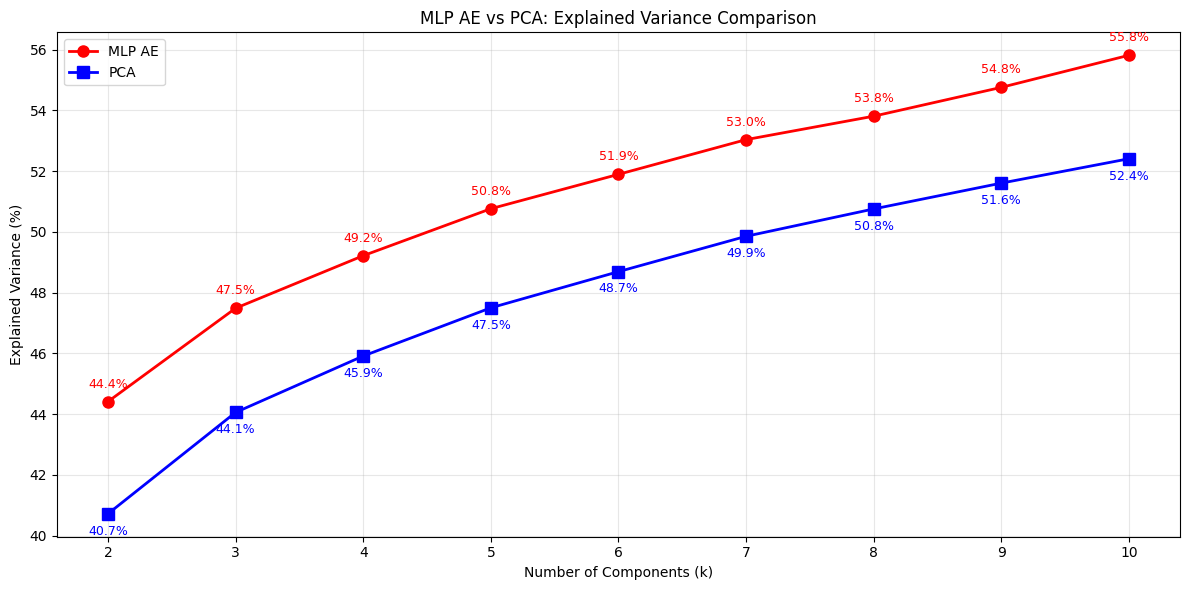

In [65]:
# PCA comparison for k=2 to 10
from sklearn.decomposition import PCA
import numpy as np

print("PCA Analysis for k=2 to 10:")
print("=" * 50)

pca_explained_variance_list = []
for k in range(2, 11):
    pca = PCA(n_components=k)
    pca_components = pca.fit_transform(log_returns)
    
    # Calculate explained variance ratio
    explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
    pca_explained_variance_list.append(explained_variance_ratio)
    
    print(f"PCA with k={k}: Explained Variance = {explained_variance_ratio:.4f} ({explained_variance_ratio*100:.2f}%)")

print("\nComparison - Autoencoder vs PCA:")
print("=" * 50)
for i, k in enumerate(range(2, 11)):
    ae_var = explained_variance_list[i] if i < len(explained_variance_list) else 0
    pca_var = pca_explained_variance_list[i]
    print(f"k={k}: AE={ae_var:.4f} ({ae_var*100:.2f}%) | PCA={pca_var:.4f} ({pca_var*100:.2f}%)")

# Plot comparison
plt.figure(figsize=(12, 6))

k_values = list(range(2, 11))
plt.plot(k_values, [v*100 for v in explained_variance_list], 'o-', color='red', linewidth=2, markersize=8, label='MLP AE')
plt.plot(k_values, [v*100 for v in pca_explained_variance_list], 's-', color='blue', linewidth=2, markersize=8, label='PCA')

plt.xlabel('Number of Components (k)')
plt.ylabel('Explained Variance (%)')
plt.title('MLP AE vs PCA: Explained Variance Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# Add value labels
for i, (ae_val, pca_val) in enumerate(zip(explained_variance_list, pca_explained_variance_list)):
    plt.annotate(f'{ae_val*100:.1f}%', (k_values[i], ae_val*100), 
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')
    plt.annotate(f'{pca_val*100:.1f}%', (k_values[i], pca_val*100), 
                textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='blue')

plt.tight_layout()
plt.show()


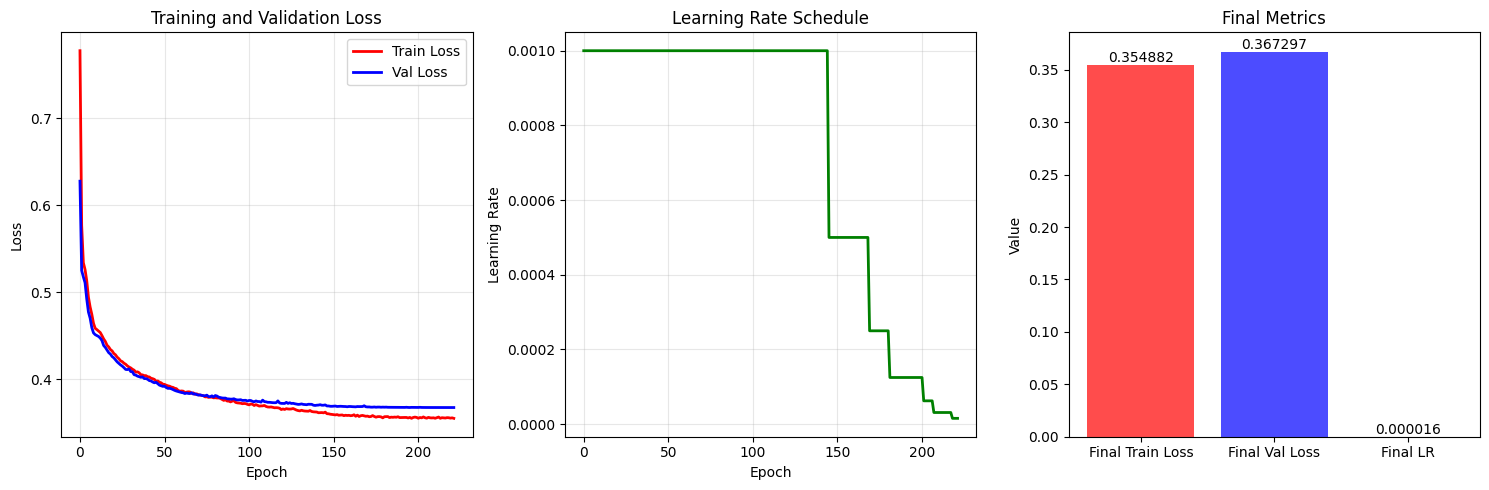

Training completed in 26.29 seconds
Final training loss: 0.354882
Final validation loss: 0.367297


In [56]:
# Plot training history
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot training loss
axes[0].plot(history['train_loss'], color='red', linewidth=2, label='Train Loss')
if history['val_loss']:
    axes[0].plot(history['val_loss'], color='blue', linewidth=2, label='Val Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot learning rate
axes[1].plot(history['lr'], color='green', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Learning Rate')
axes[1].set_title('Learning Rate Schedule')
axes[1].grid(True, alpha=0.3)

# Plot final metrics
final_train_loss = history['train_loss'][-1] if history['train_loss'] else 0
final_val_loss = history['val_loss'][-1] if history['val_loss'] else 0
final_lr = history['lr'][-1] if history['lr'] else 0

metrics = ['Final Train Loss', 'Final Val Loss', 'Final LR']
values = [final_train_loss, final_val_loss, final_lr]
colors = ['red', 'blue', 'green']

bars = axes[2].bar(metrics, values, color=colors, alpha=0.7)
axes[2].set_title('Final Metrics')
axes[2].set_ylabel('Value')

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.6f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"Training completed in {history.get('training_time', 'N/A'):.2f} seconds")
print(f"Final training loss: {final_train_loss:.6f}")
if final_val_loss > 0:
    print(f"Final validation loss: {final_val_loss:.6f}")


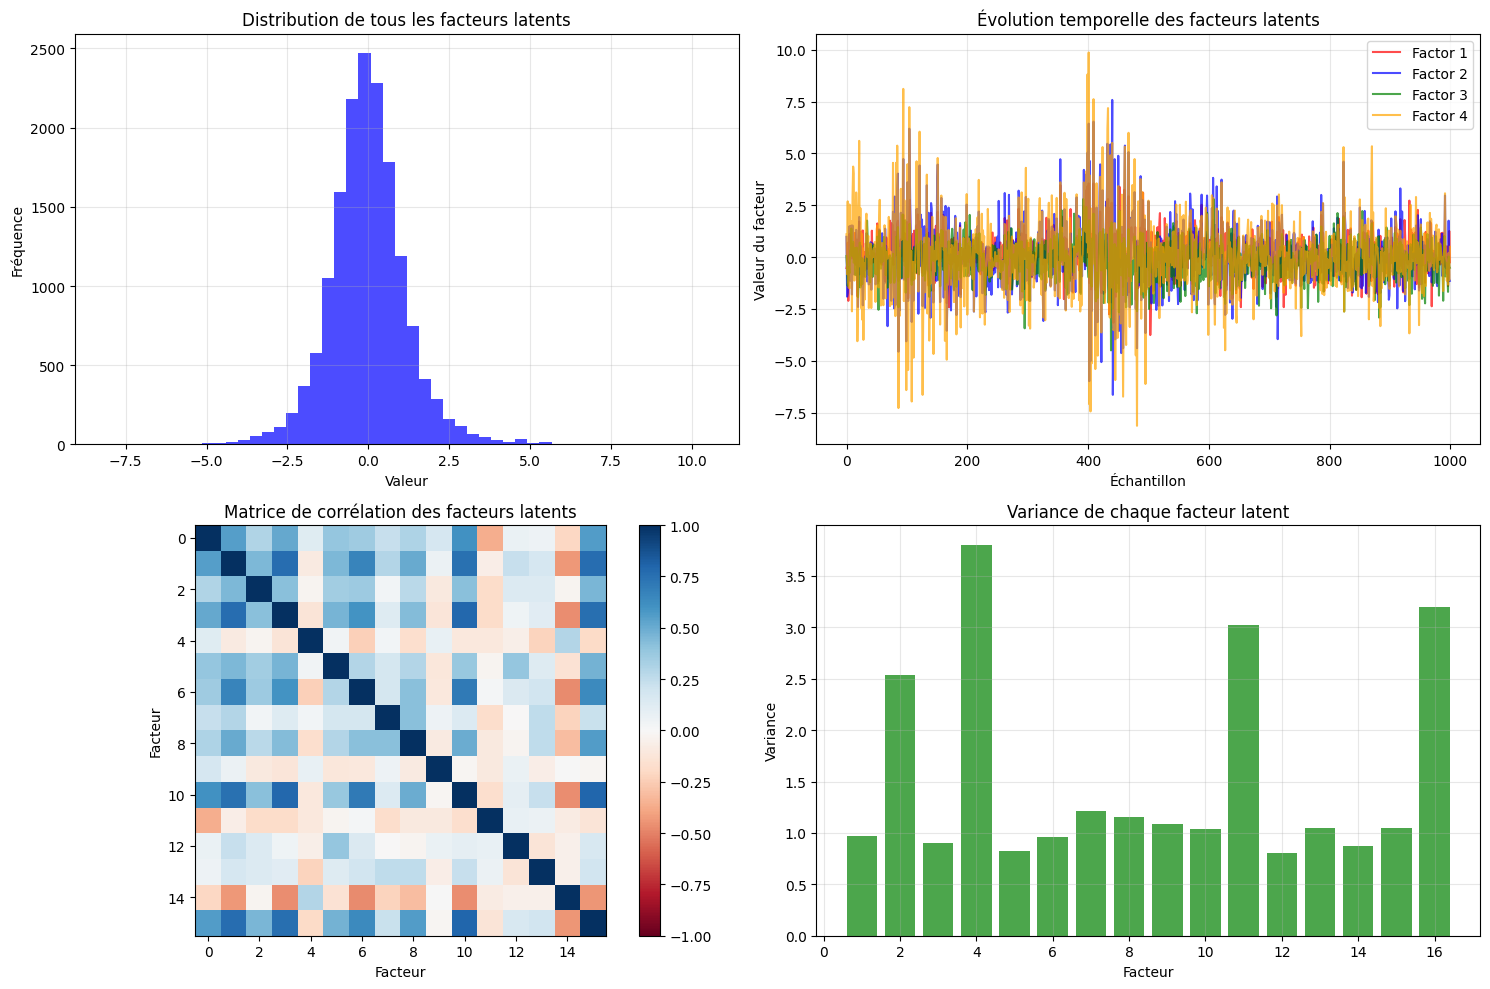

Statistiques des facteurs latents:
Nombre de facteurs: 16
Moyenne des variances: 1.530088
Écart-type des variances: 0.962646
Facteur avec la plus grande variance: Factor_4 (var=3.804904)
Facteur avec la plus petite variance: Factor_12 (var=0.803980)


In [57]:
# Visualisation des facteurs latents appris par l'autoencoder
with torch.no_grad():
    mlp_ae.eval()
    X_sample = log_returns_tensor[:1000].to(device)  # Premier millier d'échantillons
    _, latent_factors = mlp_ae(X_sample)
    latent_factors = latent_factors.cpu().numpy()

# Créer le DataFrame des facteurs latents
latent_df = pd.DataFrame(latent_factors, columns=[f'Factor_{i+1}' for i in range(latent_factors.shape[1])])

# Visualisation des facteurs latents
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribution des facteurs latents
axes[0, 0].hist(latent_factors.flatten(), bins=50, color='blue', alpha=0.7)
axes[0, 0].set_title('Distribution de tous les facteurs latents')
axes[0, 0].set_xlabel('Valeur')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].grid(True, alpha=0.3)

# 2. Évolution temporelle des premiers facteurs
n_factors_to_plot = min(4, latent_factors.shape[1])
colors = ['red', 'blue', 'green', 'orange']
for i in range(n_factors_to_plot):
    axes[0, 1].plot(latent_factors[:, i], color=colors[i], alpha=0.7, label=f'Factor {i+1}')
axes[0, 1].set_title('Évolution temporelle des facteurs latents')
axes[0, 1].set_xlabel('Échantillon')
axes[0, 1].set_ylabel('Valeur du facteur')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Corrélation entre facteurs
corr_matrix = np.corrcoef(latent_factors.T)
im = axes[1, 0].imshow(corr_matrix, cmap='RdBu', vmin=-1, vmax=1)
axes[1, 0].set_title('Matrice de corrélation des facteurs latents')
axes[1, 0].set_xlabel('Facteur')
axes[1, 0].set_ylabel('Facteur')
plt.colorbar(im, ax=axes[1, 0])

# 4. Variance expliquée par chaque facteur
factor_vars = np.var(latent_factors, axis=0)
axes[1, 1].bar(range(1, len(factor_vars)+1), factor_vars, color='green', alpha=0.7)
axes[1, 1].set_title('Variance de chaque facteur latent')
axes[1, 1].set_xlabel('Facteur')
axes[1, 1].set_ylabel('Variance')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques des facteurs latents
print("Statistiques des facteurs latents:")
print(f"Nombre de facteurs: {latent_factors.shape[1]}")
print(f"Moyenne des variances: {np.mean(factor_vars):.6f}")
print(f"Écart-type des variances: {np.std(factor_vars):.6f}")
print(f"Facteur avec la plus grande variance: Factor_{np.argmax(factor_vars)+1} (var={np.max(factor_vars):.6f})")
print(f"Facteur avec la plus petite variance: Factor_{np.argmin(factor_vars)+1} (var={np.min(factor_vars):.6f})")


In [9]:
for sector in sector_list:
    if sector != 'unknown':
        print(sector)
        make_pca_analysis(sector)
        print("------------------------------")

Health Care
Shape of transformed data: (2515, 3)

Explained variance ratio:
PC1: 0.3833 (38.33%)
PC2: 0.0588 (5.88%)
PC3: 0.0421 (4.21%)

Cumulative variance explained: 48.42%
------------------------------
Information Technology
Shape of transformed data: (2515, 3)

Explained variance ratio:
PC1: 0.4740 (47.40%)
PC2: 0.0453 (4.53%)
PC3: 0.0337 (3.37%)

Cumulative variance explained: 55.30%
------------------------------
Financials
Shape of transformed data: (2515, 3)

Explained variance ratio:
PC1: 0.5587 (55.87%)
PC2: 0.0640 (6.40%)
PC3: 0.0410 (4.10%)

Cumulative variance explained: 66.37%
------------------------------
Consumer Staples
Shape of transformed data: (2515, 3)

Explained variance ratio:
PC1: 0.3752 (37.52%)
PC2: 0.0705 (7.05%)
PC3: 0.0534 (5.34%)

Cumulative variance explained: 49.91%
------------------------------
Industrials
Shape of transformed data: (2515, 3)

Explained variance ratio:
PC1: 0.4856 (48.56%)
PC2: 0.0402 (4.02%)
PC3: 0.0349 (3.49%)

Cumulative variance

In [10]:
from src.utils.data_explo_func import get_variance_by_sector

# Display results
display(get_variance_by_sector(sector_list))

,Sector,PC1 (%),PC2 (%),PC3 (%),Total (%)
5,Utilities,68.09,5.07,3.29,76.46
9,Energy,62.90,5.80,5.37,74.06
7,Real Estate,59.01,8.75,4.50,72.26
2,Financials,55.87,6.40,4.10,66.37
6,Materials,45.92,6.55,4.84,57.31
4,Industrials,48.56,4.02,3.49,56.07
1,Information Technology,47.40,4.53,3.37,55.30
10,Communication Services,37.86,10.07,6.88,54.81
8,Consumer Discretionary,42.01,6.43,3.48,51.91
3,Consumer Staples,37.52,7.05,5.34,49.91


# Factor analysis (just a test)

In [12]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearman
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from src.utils.data_explo_func import import_sector_data

def get_pca_loadings(sector):
    """Get PCA loadings for a given sector"""
    _, sector_log_returns = import_sector_data(sector)
    
    # Standardize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(sector_log_returns)
    
    # Perform PCA
    pca = PCA(n_components=3)
    pca.fit(scaled_data)
    
    # Create loadings DataFrame
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=['PC1', 'PC2', 'PC3'],
        index=sector_log_returns.columns
    )
    
    return loadings, pca.explained_variance_ratio_

def plot_loadings_heatmap(loadings, sector, n_stocks=10):
    """Plot heatmap of top/bottom loadings"""
    # Get top and bottom stocks by PC1 loading
    top_stocks = loadings.nlargest(n_stocks, 'PC1').index
    bottom_stocks = loadings.nsmallest(n_stocks, 'PC1').index
    
    # Combine and plot
    stocks_to_plot = list(top_stocks) + list(bottom_stocks)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        loadings.loc[stocks_to_plot, ['PC1', 'PC2', 'PC3']],
        center=0,
        cmap='RdBu',
        annot=True,
        fmt='.2f'
    )
    plt.title(f'PCA Loadings - {sector}')
    plt.tight_layout()
    plt.savefig(f'figures/loadings_heatmap_{sector.lower().replace(" ", "_")}.png')
    plt.close()

def compute_rolling_pca(sector, window=252):
    """Compute rolling PCA for a sector"""
    _, sector_log_returns = import_sector_data(sector)
    
    rolling_var_explained = []
    
    for i in range(window, len(sector_log_returns)):
        window_data = sector_log_returns.iloc[i-window:i]
        pca = PCA(n_components=3)
        pca.fit(StandardScaler().fit_transform(window_data))
        rolling_var_explained.append({
            'date': sector_log_returns.index[i],
            'PC1': pca.explained_variance_ratio_[0],
            'PC2': pca.explained_variance_ratio_[1],
            'PC3': pca.explained_variance_ratio_[2]
        })
    
    return pd.DataFrame(rolling_var_explained).set_index('date')

def create_pc1_factor(sector, n_stocks=10):
    """Create long-short portfolio based on PC1 loadings"""
    _, sector_log_returns = import_sector_data(sector)
    loadings, _ = get_pca_loadings(sector)
    
    # Get top and bottom stocks
    top_stocks = loadings.nlargest(n_stocks, 'PC1').index
    bottom_stocks = loadings.nsmallest(n_stocks, 'PC1').index
    
    # Create long-short portfolio returns
    long_portfolio = sector_log_returns[top_stocks].mean(axis=1)
    short_portfolio = sector_log_returns[bottom_stocks].mean(axis=1)
    factor_returns = long_portfolio - short_portfolio
    
    return factor_returns

# Run analysis for each sector
pc1_factors = {}
rolling_pcas = {}

for sector in sector_list:
    if sector != 'unknown':
        print(f"Processing {sector}...")
        
        # Get and save loadings
        loadings, var_explained = get_pca_loadings(sector)
        loadings.to_csv(f'data/processed/pca_loadings_{sector.lower().replace(" ", "_")}.csv')
        
        # Plot loadings heatmap
        plot_loadings_heatmap(loadings, sector)
        
        # Compute rolling PCA
        rolling_pca = compute_rolling_pca(sector)
        rolling_pcas[sector] = rolling_pca
        rolling_pca.to_csv(f'data/processed/rolling_pca_{sector.lower().replace(" ", "_")}.csv')
        
        # Create PC1 factor
        pc1_factors[sector] = create_pc1_factor(sector)

# Compute correlations between PC1 factors
pc1_factors_df = pd.DataFrame(pc1_factors)
correlations = pc1_factors_df.corr(method='spearman')

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='RdBu', center=0, fmt='.2f')
plt.title('Correlations between Sector PC1 Factors')
plt.tight_layout()
plt.savefig('figures/pc1_factors_correlation.png')
plt.close()

print("\nAnalysis complete. Results saved to data/processed/ and figures/")


Processing Health Care...
Processing Information Technology...
Processing Financials...
Processing Consumer Staples...
Processing Industrials...
Processing Utilities...
Processing Materials...
Processing Real Estate...
Processing Consumer Discretionary...
Processing Energy...
Processing Communication Services...

Analysis complete. Results saved to data/processed/ and figures/


à traduire ensuite : 
    
je vois que les corrélations entre les PC1 sectoriels sont assez faibles donc ça veut dire que les "dynamiques" internes sont indépendantes. Je pensais que le problème venait du fait que je n'ai pas soustrait le risk free rate (finalement après réflexion, c'est uniquement économiquement cohérent mais ça ne changerait pas les calculs --> en parler dans le mémoire)

En prenant PC1, on a donc un facteur propre au secteur lui même et pas un facteur global de marché (puisque peu corrélé)

On voit que certains facteurs sont très corrélés (Financials et Consumer Discretionary), tendance à bouger dans le même sens (réfléchir impact macro)

In [ ]:
# Pour tracer graphe networkx

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Plot correlation network
def compute_corr_from_pc1(pc1_df):
    return pc1_df.corr(min_periods=int(0.5 * len(pc1_df)))

def build_corr_graph(corr, threshold=0.20):
    sectors = list(corr.columns)
    G = nx.Graph()
    for s in sectors:
        G.add_node(s)
        
    for i, a in enumerate(sectors):
        for b in sectors[i+1:]:
            val = corr.loc[a, b]
            if pd.notna(val) and abs(val) >= threshold:
                G.add_edge(a, b, weight=float(abs(val)), sign=1.0 if val >= 0 else -1.0, corr=float(val))
    return G

def plot_corr_network(corr_or_pc1, threshold=0.20, is_corr_matrix=False, 
                     with_edge_labels=True, node_scale=1200.0, seed=42, title=None):
    
    if is_corr_matrix:
        corr = corr_or_pc1.copy()
    else:
        corr = compute_corr_from_pc1(corr_or_pc1)
        
    G = build_corr_graph(corr, threshold=threshold)
    
    if len(G.nodes) == 0:
        raise ValueError("No nodes/edges after thresholding. Lower the threshold.")
        
    # Node sizes proportional to strength (sum of incident edge weights)
    strength = {n: sum(d.get("weight", 0.0) for _, _, d in G.edges(n, data=True)) for n in G.nodes}
    sizes = [node_scale * (0.5 + strength[n]) for n in G.nodes]
    
    # Layout
    pos = nx.spring_layout(G, seed=seed, weight="weight")
    
    # Prepare edge styles: solid (corr>0), dashed (corr<0)
    edges_pos = [(u, v) for (u, v, d) in G.edges(data=True) if d["sign"] > 0]
    edges_neg = [(u, v) for (u, v, d) in G.edges(data=True) if d["sign"] < 0]
    
    width_map = {(u, v): 1.0 + 6.0 * G[u][v]["weight"] for (u, v) in G.edges()}
    widths_pos = [width_map[e] for e in edges_pos]
    widths_neg = [width_map[e] for e in edges_neg]
    
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, node_size=sizes)
    nx.draw_networkx_edges(G, pos, edgelist=edges_pos, width=widths_pos, style="solid")
    nx.draw_networkx_edges(G, pos, edgelist=edges_neg, width=widths_neg, style="dashed")
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    if with_edge_labels:
        edge_labels = {(u, v): f'{G[u][v]["corr"]:.2f}' for (u, v) in G.edges()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
        
    ttl = title or "Correlation Network of Sector PC1 Factors"
    plt.title(ttl)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig('figures/pc1_correlation_network.png')
    plt.close()
    
    return {"corr": corr, "graph": G, "pos": pos}

# Plot correlation network
plot_corr_network(pc1_factors_df, threshold=0.20)

{'corr':                         Health Care  Information Technology  Financials  \
 Health Care                1.000000                0.147964    0.059915   
 Information Technology     0.147964                1.000000    0.120812   
 Financials                 0.059915                0.120812    1.000000   
 Consumer Staples           0.010428               -0.060060   -0.374093   
 Industrials                0.139653                0.183423    0.256137   
 Utilities                 -0.040510               -0.053472   -0.307673   
 Materials                  0.056101                0.108537    0.191310   
 Real Estate                0.024847                0.049592    0.133163   
 Consumer Discretionary     0.150642                0.110391    0.453711   
 Energy                     0.052968                0.033651    0.228544   
 Communication Services     0.129085                0.172152    0.308092   
 
                         Consumer Staples  Industrials  Utilities  Materials  

# Let's try to substract the risk free rate from the returns

In [1]:
log_returns

NameError: name 'log_returns' is not defined

# 